# EDA - SALARIOS

## Librerías

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import squarify
from wordcloud import WordCloud
import country_converter as coco
import plotly.express as px
import plotly.figure_factory as ff
import plotly.graph_objects as go



## Carga de Datos

In [7]:
df = pd.read_csv(r'C:/Users/laura/Desktop/SALARY_ANALYSIS/data/ds_salaries.csv', sep = ',')

## Primera exploración

In [8]:
df.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L
1,2023,MI,CT,ML Engineer,30000,USD,30000,US,100,US,S
2,2023,MI,CT,ML Engineer,25500,USD,25500,US,100,US,S
3,2023,SE,FT,Data Scientist,175000,USD,175000,CA,100,CA,M
4,2023,SE,FT,Data Scientist,120000,USD,120000,CA,100,CA,M


In [21]:
df['work_year'].unique()

array([2023, 2022, 2020, 2021], dtype=int64)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3755 entries, 0 to 3754
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           3755 non-null   int64 
 1   experience_level    3755 non-null   object
 2   employment_type     3755 non-null   object
 3   job_title           3755 non-null   object
 4   salary              3755 non-null   int64 
 5   salary_currency     3755 non-null   object
 6   salary_in_usd       3755 non-null   int64 
 7   employee_residence  3755 non-null   object
 8   remote_ratio        3755 non-null   int64 
 9   company_location    3755 non-null   object
 10  company_size        3755 non-null   object
dtypes: int64(4), object(7)
memory usage: 322.8+ KB


In [10]:
df.dtypes

work_year              int64
experience_level      object
employment_type       object
job_title             object
salary                 int64
salary_currency       object
salary_in_usd          int64
employee_residence    object
remote_ratio           int64
company_location      object
company_size          object
dtype: object

In [11]:
df.shape

(3755, 11)

In [12]:
df.columns

Index(['work_year', 'experience_level', 'employment_type', 'job_title',
       'salary', 'salary_currency', 'salary_in_usd', 'employee_residence',
       'remote_ratio', 'company_location', 'company_size'],
      dtype='object')

In [20]:
df.describe(include=int).round(2)

,work_year,salary,salary_in_usd,remote_ratio
count,3755.00,3755.00,3755.00,3755.00
mean,2022.37,190695.57,137570.39,46.27
std,0.69,671676.50,63055.63,48.59
min,2020.00,6000.00,5132.00,0.00
25%,2022.00,100000.00,95000.00,0.00
50%,2022.00,138000.00,135000.00,0.00
75%,2023.00,180000.00,175000.00,100.00
max,2023.00,30400000.00,450000.00,100.00


In [19]:
df.describe(include=object).round(2)

,experience_level,employment_type,job_title,salary_currency,employee_residence,company_location,company_size
count,3755,3755,3755,3755,3755,3755,3755
unique,4,4,93,20,78,72,3
top,SE,FT,Data Engineer,USD,US,US,M
freq,2516,3718,1040,3224,3004,3040,3153


In [15]:
for i in df.select_dtypes(include=object):
    print(f"La cardinalidad de la variable {i} es {(df[i].nunique()/df.shape[0])*100:.2f}%")

La cardinalidad de la variable experience_level es 0.11%
La cardinalidad de la variable employment_type es 0.11%
La cardinalidad de la variable job_title es 2.48%
La cardinalidad de la variable salary_currency es 0.53%
La cardinalidad de la variable employee_residence es 2.08%
La cardinalidad de la variable company_location es 1.92%
La cardinalidad de la variable company_size es 0.08%


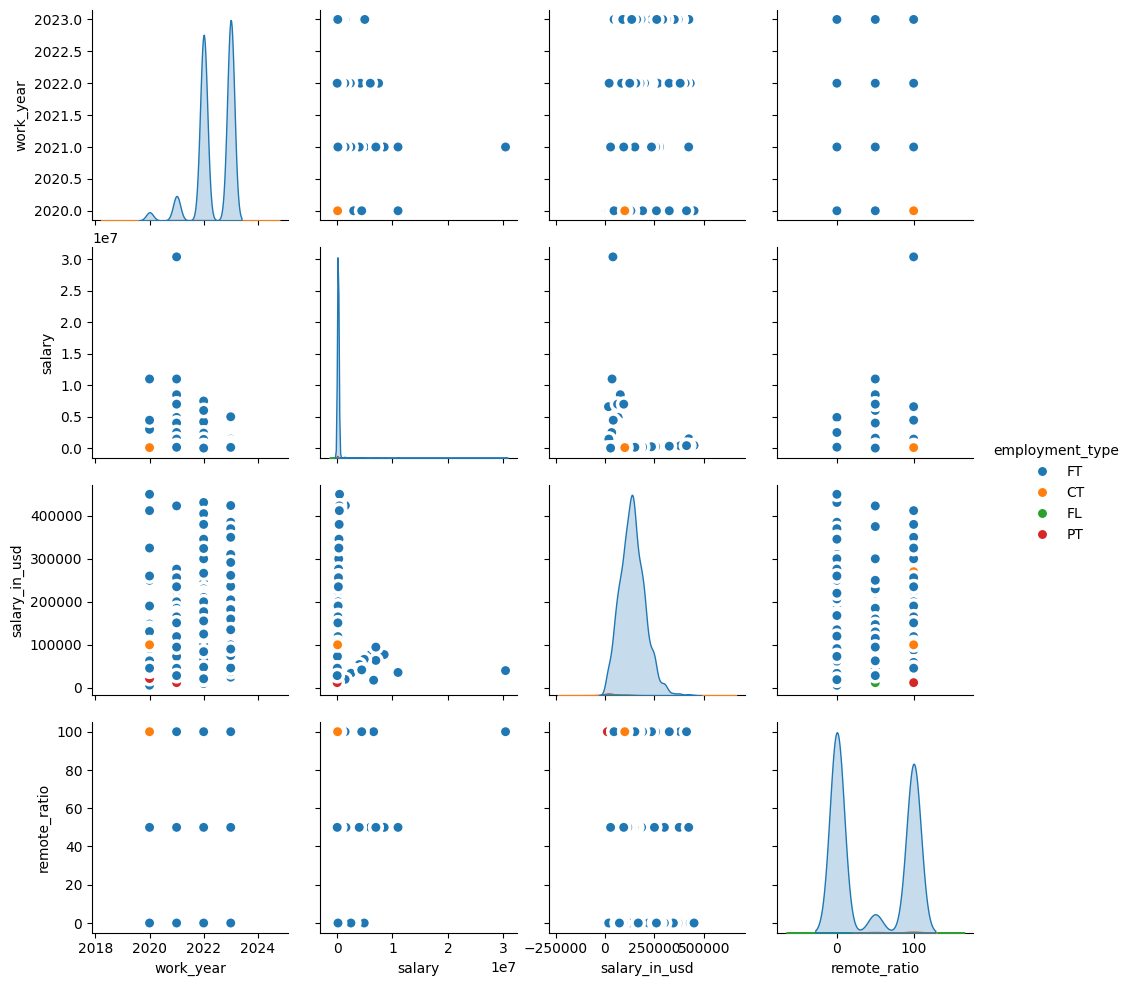

In [16]:
sns.pairplot(df, kind='scatter', hue='employment_type',
            plot_kws=dict(s=80, edgecolor='white',linewidth=2.5));

## Hipótesis

### Estadísticas

**Hipótesis 1 :**

Los salarios de los puestos de trabajos relacionados con data science son mayores que los de otros sectores con mismo nivel educativo.

**Hipótesis 2 :**

Dentro del sector data science ¿Son iguales los salarios entre hombres y mujeres con el mismo puesto de trabajo y nivel educativo?


**Hipótesis 3 :**

Dentro del sector Data Science ¿Existe una relación positiva entre los años de experiencia y el salario?

### Gráficamente

1. 
2. 
3. 
4. 

## Limpieza

In [13]:
df.drop(df[['salary','salary_currency']], axis = 1, inplace = True)
# quito esas dos columnas para quedarme solo con los salarios en $

In [14]:
df.isnull().sum()

work_year             0
experience_level      0
employment_type       0
job_title             0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

In [15]:
df

,work_year,experience_level,employment_type,job_title,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,85847,ES,100,ES,L
1,2023,MI,CT,ML Engineer,30000,US,100,US,S
2,2023,MI,CT,ML Engineer,25500,US,100,US,S
3,2023,SE,FT,Data Scientist,175000,CA,100,CA,M
4,2023,SE,FT,Data Scientist,120000,CA,100,CA,M
...,...,...,...,...,...,...,...,...,...
3750,2020,SE,FT,Data Scientist,412000,US,100,US,L
3751,2021,MI,FT,Principal Data Scientist,151000,US,100,US,L
3752,2020,EN,FT,Data Scientist,105000,US,100,US,S
3753,2020,EN,CT,Business Data Analyst,100000,US,100,US,L


## Analisis


### Analsis Univariante


- teorema limite central  (med, mod, median)
- muestra media moda y median y sus distribuciones
- distribución por especie
- conteo de valores por especies y % del total
- distrib sexos
- graficar desv estandar y varienza
distribuciones rango, max, min

**VARIABLES CUALITATIVAS**

Employment level:

In [16]:
df.experience_level.value_counts()

experience_level
SE    2516
MI     805
EN     320
EX     114
Name: count, dtype: int64

Siglas experience level:

EN, which refers to Entry-level / Junior.

MI, which refers to Mid-level / Intermediate.

SE, which refers to Senior-level / Expert.

EX, which refers to Executive-level / Director.

In [17]:
df.experience_level.mode()

0    SE
Name: experience_level, dtype: object

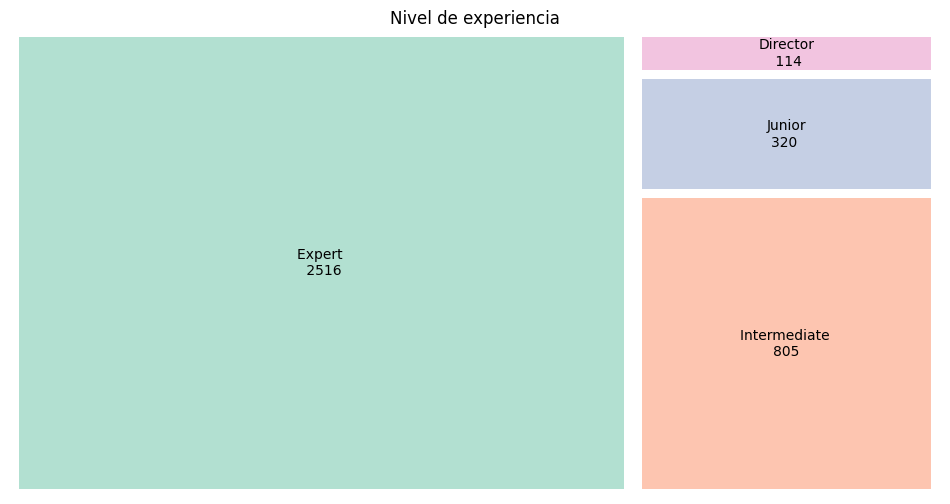

In [18]:
plt.figure(figsize=(12,6))
plt.axis('off')

exp_level_plot = squarify.plot(sizes = df['experience_level'].value_counts(), label=['Expert \n 2516','Intermediate \n805', 'Junior\n320 ', 'Director\n 114'], 
              alpha = 0.5, pad = True, color= sns.color_palette('Set2'))
exp_level_plot.set_title('Nivel de experiencia');

In [19]:
df2 = df.copy()

In [20]:
df2['employment_type'] = df2['employment_type'].replace('PT','Part-Time')
df2['employment_type'] = df2['employment_type'].replace('FT','Full-Time')
df2['employment_type'] = df2['employment_type'].replace('CT','Contract')
df2['employment_type'] = df2['employment_type'].replace('FL','Freelance')

In [21]:
labels = df2['employment_type'].value_counts(normalize=True).to_dict()
labels

{'Full-Time': 0.9901464713715047,
 'Part-Time': 0.004527296937416778,
 'Contract': 0.002663115845539281,
 'Freelance': 0.002663115845539281}

<Figure size 1200x600 with 0 Axes>

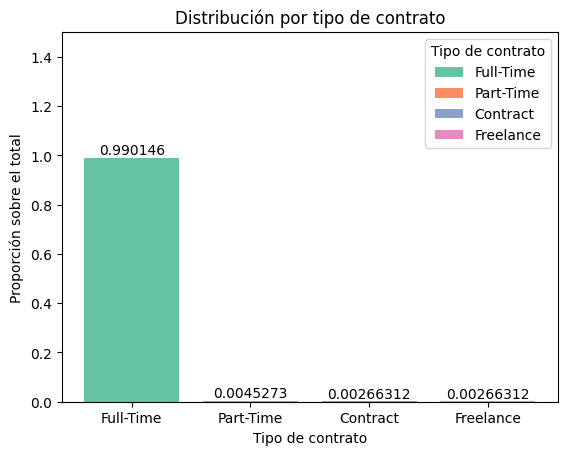

In [22]:
plt.figure(figsize=(12,6))
fig, ax = plt.subplots()
bar_labels = labels.keys()
employ_type_plot = plt.bar(labels.keys(), labels.values(), label = labels.keys(),color= sns.color_palette('Set2'));

ax.set_title('Distribución por tipo de contrato')
ax.legend(title='Tipo de contrato')
ax.set(ylabel='Proporción sobre el total', ylim=(0, 1.5))
ax.set(xlabel='Tipo de contrato')
bar_container = ax.bar(labels.keys(), labels.values(), color= sns.color_palette('Set2'))
ax.bar_label(bar_container,)
plt.show();

In [90]:
ratio = pd.DataFrame(df.groupby('job_title')['remote_ratio'].mean().round(2))
ratio.sort_values(by='remote_ratio', inplace=True, ascending=False)
ratio = ratio[:15]
ratio

,remote_ratio
job_title,
Staff Data Scientist,100.00
Principal Data Engineer,100.00
MLOps Engineer,100.00
Manager Data Management,100.00
Marketing Data Analyst,100.00
Compliance Data Analyst,100.00
Cloud Database Engineer,100.00
Principal Data Analyst,100.00
Principal Data Architect,100.00


<Axes: ylabel='job_title'>

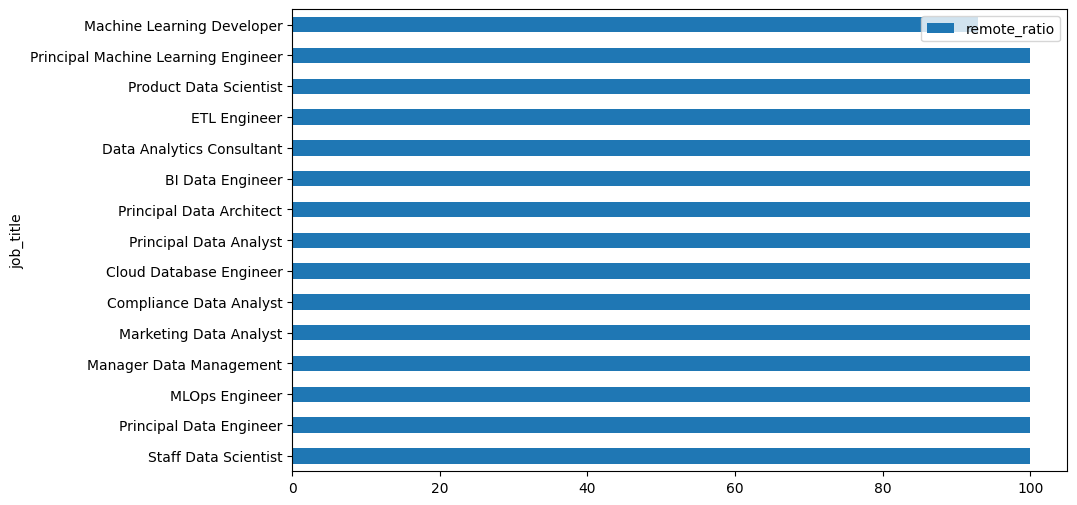

In [105]:
ratio.plot(kind='barh', stacked=False, figsize=(10, 6))

In [110]:
ratio_trans = ratio.transpose()

C:\Users\laura\AppData\Local\Temp\ipykernel_7276\1643457176.py:2: UserWarning: 
The palette list has fewer values (8) than needed (15) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(data=ratio_trans, orient='h', palette=sns.color_palette('Set2'))


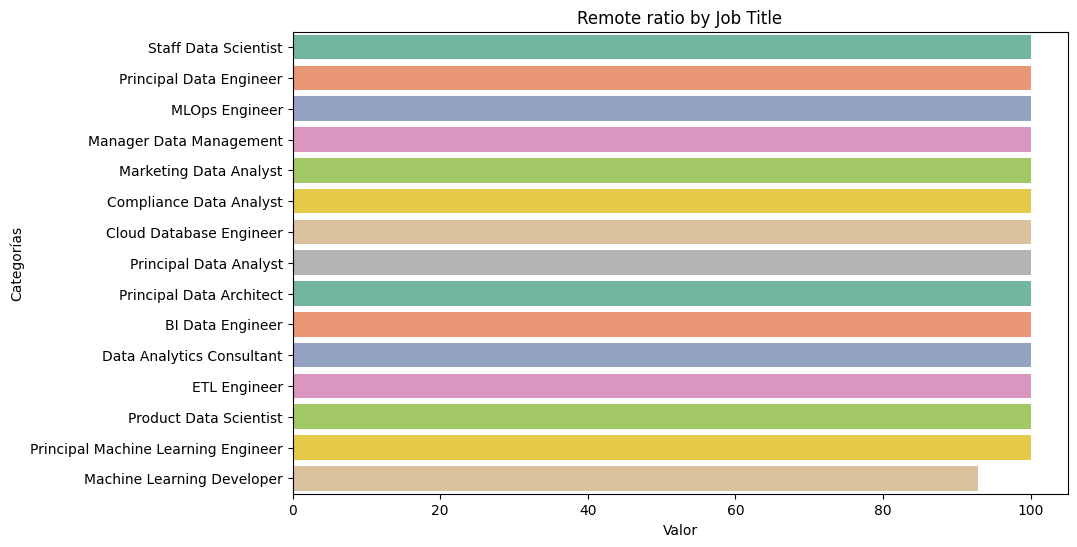

In [112]:
plt.figure(figsize=(10, 6))
sns.barplot(data=ratio_trans, orient='h', palette=sns.color_palette('Set2'))
plt.xlabel('Valor')
plt.ylabel('Categorías')
plt.title('Remote ratio by Job Title')
plt.show()


In [91]:
top_salary_job = pd.DataFrame(df.groupby('job_title')['salary'].mean().round(2))
top_salary_job.sort_values(by='salary', inplace=True, ascending=False)
top_salary_job = top_salary_job[:15]
top_salary_job

,salary
job_title,
Head of Machine Learning,6000000.00
Principal Data Architect,3000000.00
Lead Machine Learning Engineer,2548666.67
Lead Data Scientist,928485.33
Data Analytics Lead,922500.00
BI Data Analyst,836644.80
Head of Data Science,703729.44
Lead Data Analyst,655000.00
ML Engineer,609997.91


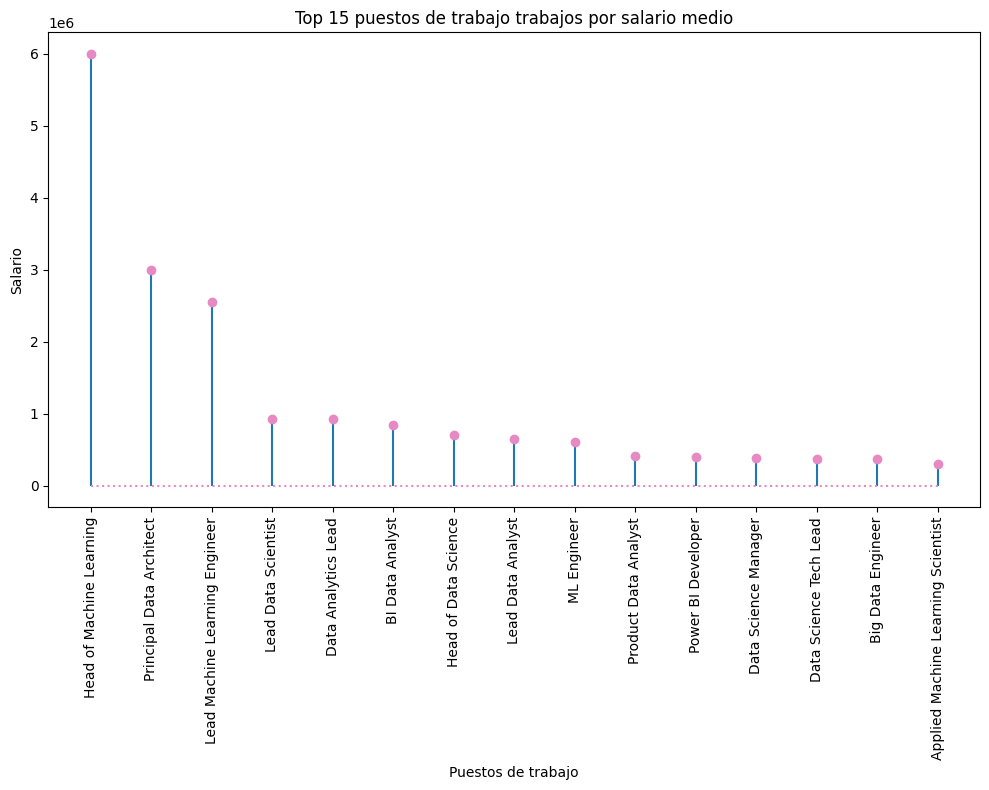

In [138]:
plt.figure(figsize=(10, 8))
plt.stem(top_salary_job.index, top_salary_job['salary'], markerfmt='o', linefmt='-', basefmt=':')

colors = sns.color_palette('Set2')
plt.setp(plt.gca().get_lines(), color=colors[3])

plt.xticks(rotation=90)
plt.xlabel('Puestos de trabajo')
plt.ylabel('Salario')
plt.title('Top 15 puestos de trabajo trabajos por salario medio')
plt.tight_layout()
plt.show()

In [73]:
jobs = df['job_title'].value_counts()[:15].to_dict()


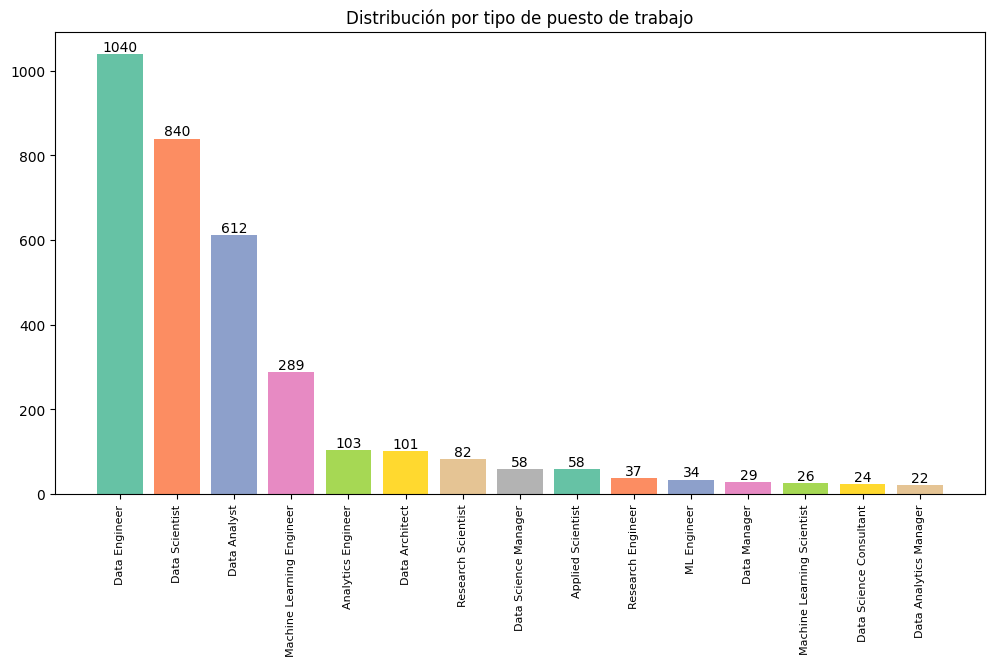

In [76]:
plt.figure(figsize=(12,6))
employ_name = plt.bar(jobs.keys(), jobs.values(), label = jobs.keys(),color= sns.color_palette('Set2'));

plt.title('Distribución por tipo de puesto de trabajo')
plt.xticks(rotation= 90, fontsize= 8)
bar_container = plt.bar(jobs.keys(), jobs.values(), color= sns.color_palette('Set2'))
plt.bar_label(bar_container,)

plt.show();



In [26]:
emply_res = pd.DataFrame(df['employee_residence'].value_counts()[:20])
emply_res.reset_index(inplace=True)

In [27]:
country_names = {
                    'US': 'Estados Unidos',
                    'GB': 'Reino Unido',
                    'CA': 'Canadá',
                    'ES': 'España',
                    'IN': 'India',
                    'DE': 'Alemania',
                    'FR': 'Francia',
                    'PT': 'Portugal',
                    'BR': 'Brasil',
                    'GR': 'Grecia',
                    'NL': 'Países Bajos',
                    'AU': 'Australia',
                    'MX': 'México',
                    'IT': 'Italia',
                    'PK': 'Pakistán',
                    'JP': 'Japón',
                    'IE': 'Irlanda',
                    'NG': 'Nigeria',
                    'AT': 'Austria',
                    'AR': 'Argentina'}

C:\Users\laura\AppData\Local\Temp\ipykernel_16888\648272376.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=emply_res,x='employee_residence', y = 'count', palette= sns.color_palette('Set2'))
C:\Users\laura\AppData\Local\Temp\ipykernel_16888\648272376.py:3: UserWarning: 
The palette list has fewer values (8) than needed (20) and will cycle, which may produce an uninterpretable plot.
  ax = sns.barplot(data=emply_res,x='employee_residence', y = 'count', palette= sns.color_palette('Set2'))


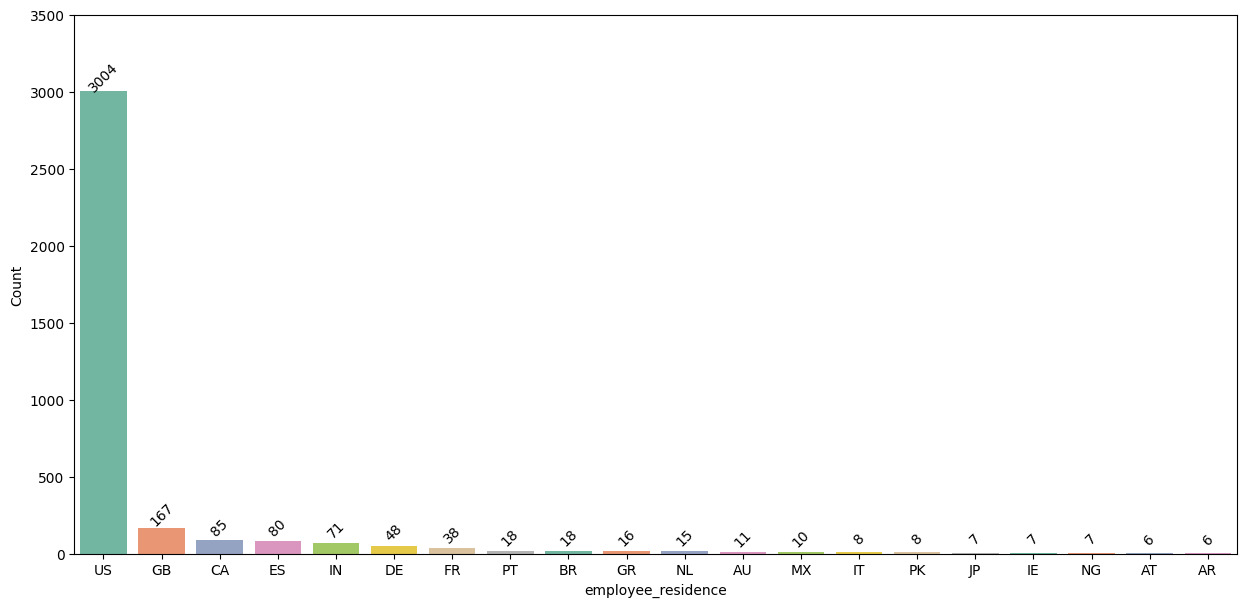

In [28]:
plt.figure(figsize=(15,7))

ax = sns.barplot(data=emply_res,x='employee_residence', y = 'count', palette= sns.color_palette('Set2'))
ax.set(ylabel='Count', ylim=(0, 3500))


for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center',
                va='center',
                rotation = 45,
                xytext=(0, 10),
                textcoords='offset points')

plt.show()

In [30]:
comp_loc = pd.DataFrame(df['company_location'].value_counts()[:20])


C:\Users\laura\AppData\Local\Temp\ipykernel_16888\444802086.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=comp_loc,x='company_location', y = 'count', palette= sns.color_palette('Set2'))
C:\Users\laura\AppData\Local\Temp\ipykernel_16888\444802086.py:3: UserWarning: 
The palette list has fewer values (8) than needed (20) and will cycle, which may produce an uninterpretable plot.
  ax = sns.barplot(data=comp_loc,x='company_location', y = 'count', palette= sns.color_palette('Set2'))


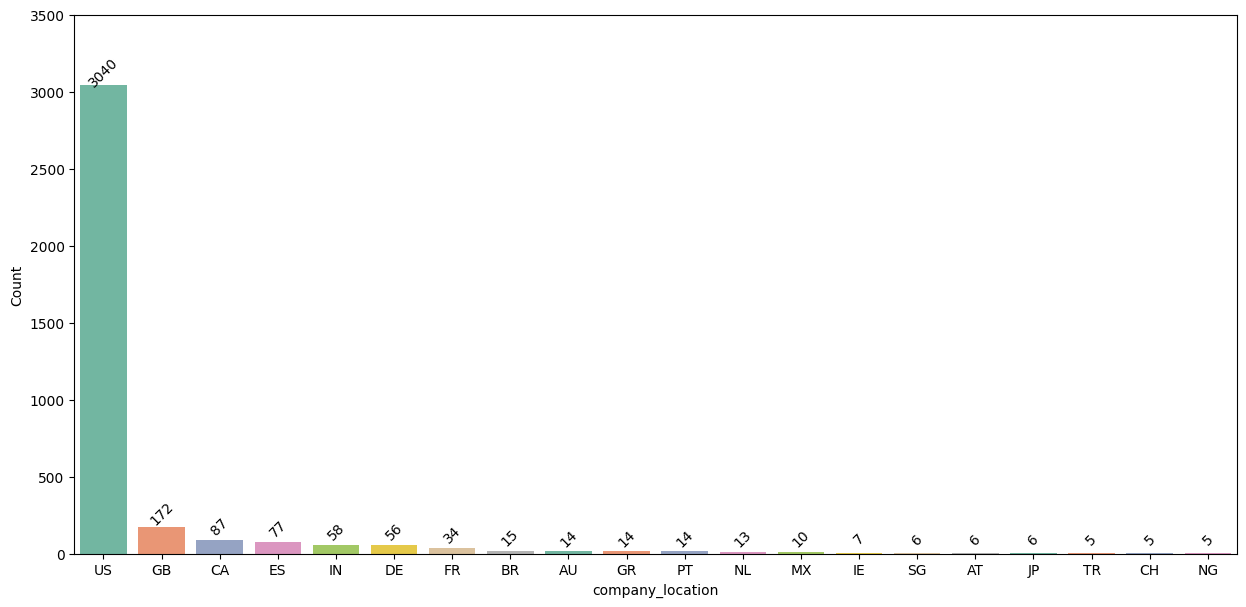

In [31]:
plt.figure(figsize=(15,7))

ax = sns.barplot(data=comp_loc,x='company_location', y = 'count', palette= sns.color_palette('Set2'))
ax.set(ylabel='Count', ylim=(0, 3500))


for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center',
                va='center',
                rotation = 45,
                xytext=(0, 10),
                textcoords='offset points')

plt.show()

In [ ]:
sizes =df['company_size'].value_counts()
sizes

company_size
M    3153
L     454
S     148
Name: count, dtype: int64

C:\Users\laura\AppData\Local\Temp\ipykernel_19476\129211146.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(sizes, palette=sns.color_palette('Set2'))
C:\Users\laura\AppData\Local\Temp\ipykernel_19476\129211146.py:2: UserWarning: The palette list has more values (8) than needed (3), which may not be intended.
  ax = sns.barplot(sizes, palette=sns.color_palette('Set2'))


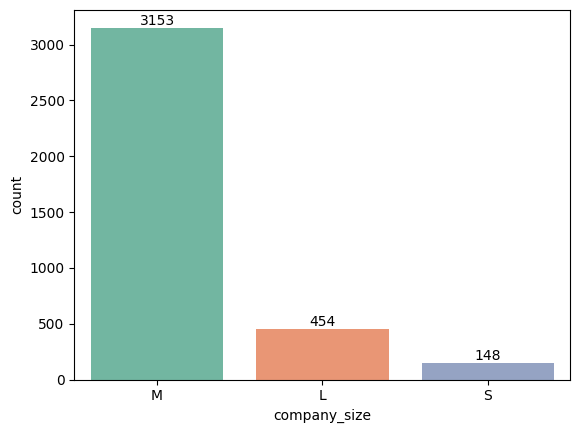

In [ ]:
plt.figure()
ax = sns.barplot(sizes, palette=sns.color_palette('Set2'))

for i in ax.containers:
    ax.bar_label(i,)

 sns.barplot method will return a list of sub methods. use containers method to access  the text label of each bar by passing it  through the ax.bar_label function use for loop to iterate through the list of labels and assign each bar to a different  label.

In [117]:
df.select_dtypes('object')

,experience_level,employment_type,job_title,employee_residence,company_location,company_size
0,SE,FT,Principal Data Scientist,ESP,ESP,L
1,MI,CT,ML Engineer,USA,USA,S
2,MI,CT,ML Engineer,USA,USA,S
3,SE,FT,Data Scientist,CAN,CAN,M
4,SE,FT,Data Scientist,CAN,CAN,M
...,...,...,...,...,...,...
3750,SE,FT,Data Scientist,USA,USA,L
3751,MI,FT,Principal Data Scientist,USA,USA,L
3752,EN,FT,Data Scientist,USA,USA,S
3753,EN,CT,Business Data Analyst,USA,USA,L


In [114]:
country = coco.convert(names = df['employee_residence'], to = "ISO3")
df['employee_residence'] = country

In [116]:
country = coco.convert(names = df['company_location'], to = "ISO3")
df['company_location'] = country

In [119]:
residence = df['employee_residence'].value_counts()
px.choropleth(locations = residence.index,
                    color = residence.values,
                    color_continuous_scale=px.colors.sequential.Plotly3,
                    title = 'Employee Loaction On Map')


ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

Figure({
    'data': [{'coloraxis': 'coloraxis',
              'geo': 'geo',
              'hovertemplate': 'locations=%{location}<br>color=%{z}<extra></extra>',
              'locations': array(['USA', 'GBR', 'CAN', 'ESP', 'IND', 'DEU', 'FRA', 'PRT', 'BRA', 'GRC',
                                  'NLD', 'AUS', 'MEX', 'ITA', 'PAK', 'JPN', 'IRL', 'NGA', 'AUT', 'ARG',
                                  'POL', 'PRI', 'TUR', 'BEL', 'SGP', 'RUS', 'LVA', 'UKR', 'COL', 'CHE',
                                  'SVN', 'BOL', 'DNK', 'HRV', 'HUN', 'ROU', 'THA', 'ARE', 'VNM', 'HKG',
                                  'UZB', 'PHL', 'CAF', 'CHL', 'FIN', 'CZE', 'SWE', 'ASM', 'LTU', 'GHA',
                                  'KEN', 'DZA', 'NZL', 'JEY', 'MYS', 'MDA', 'IRQ', 'BGR', 'LUX', 'SRB',
                                  'HND', 'EST', 'TUN', 'CRI', 'IDN', 'EGY', 'DOM', 'CHN', 'SVK', 'IRN',
                                  'MAR', 'ISR', 'MKD', 'BIH', 'ARM', 'CYP', 'KWT', 'MLT'], dtype=object),
              'name': '',
              'type': 'choropleth',
              'z': array([3004,  167,   85,   80,   71,   48,   38,   18,   18,   16,   15,   11,
                            10,    8,    8,    7,    7,    7,    6,    6,    6,    5,    5,    5,
                             5,    4,    4,    4,    4,    4,    4,    3,    3,    3,    3,    3,
                             3,    3,    3,    2,    2,    2,    2,    2,    2,    2,    2,    2,
                             2,    2,    2,    1,    1,    1,    1,    1,    1,    1,    1,    1,
                             1,    1,    1,    1,    1,    1,    1,    1,    1,    1,    1,    1,
                             1,    1,    1,    1,    1,    1], dtype=int64)}],
    'layout': {'coloraxis': {'colorbar': {'title': {'text': 'color'}},
                             'colorscale': [[0.0, '#0508b8'],
                                            [0.08333333333333333, '#1910d8'],
                                            [0.16666666666666666, '#3c19f0'],
                                            [0.25, '#6b1cfb'], [0.3333333333333333,
                                            '#981cfd'], [0.4166666666666667,
                                            '#bf1cfd'], [0.5, '#dd2bfd'],
                                            [0.5833333333333334, '#f246fe'],
                                            [0.6666666666666666, '#fc67fd'], [0.75,
                                            '#fe88fc'], [0.8333333333333334,
                                            '#fea5fd'], [0.9166666666666666,
                                            '#febefe'], [1.0, '#fec3fe']]},
               'geo': {'center': {}, 'domain': {'x': [0.0, 1.0], 'y': [0.0, 1.0]}},
               'legend': {'tracegroupgap': 0},
               'template': '...',
               'title': {'text': 'Employee Loaction On Map'}}
})

**VARIABLES CUANTITATIVAS**

In [33]:
df.select_dtypes(exclude='object')

,work_year,salary_in_usd,remote_ratio
0,2023,85847,100
1,2023,30000,100
2,2023,25500,100
3,2023,175000,100
4,2023,120000,100
...,...,...,...
3750,2020,412000,100
3751,2021,151000,100
3752,2020,105000,100
3753,2020,100000,100


C:\Users\laura\AppData\Local\Temp\ipykernel_7276\1979777247.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data= df['salary_in_usd'], palette=sns.color_palette('Set2'), legend= 'full');
C:\Users\laura\AppData\Local\Temp\ipykernel_7276\1979777247.py:3: UserWarning: The palette list has more values (8) than needed (1), which may not be intended.
  sns.boxplot(data= df['salary_in_usd'], palette=sns.color_palette('Set2'), legend= 'full');


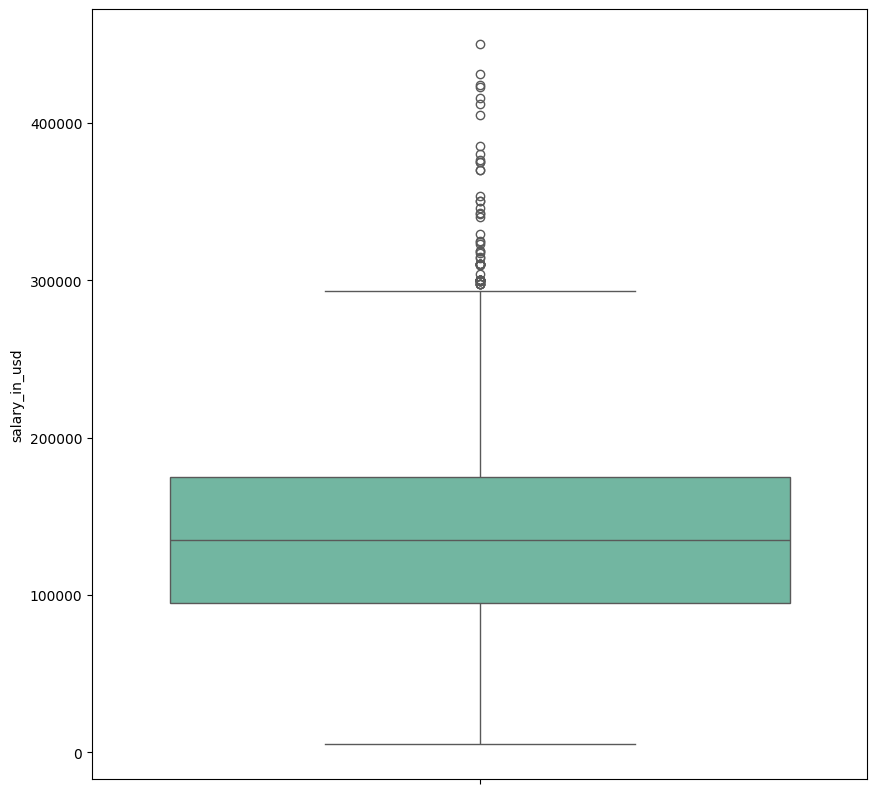

In [141]:
plt.figure(figsize=(10,10))

sns.boxplot(data= df['salary_in_usd'], palette=sns.color_palette('Set2'), legend= 'full');

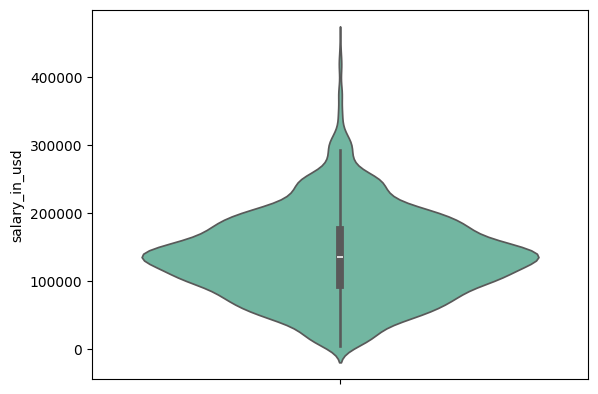

In [71]:
sns.violinplot(df['salary_in_usd'], palette=sns.color_palette('Set2'), inner = 'box');

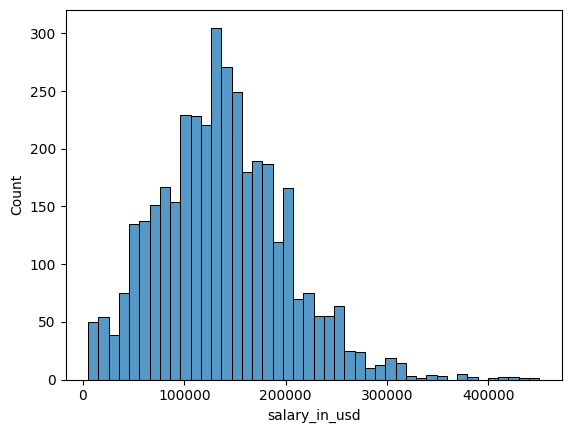

In [76]:
sns.histplot(df['salary_in_usd'], palette=sns.color_palette('Set2'));

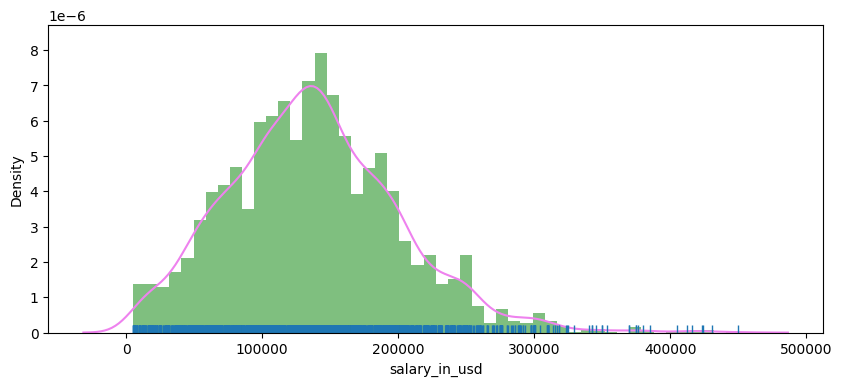

In [80]:
plt.figure(figsize=(10,4))
sns.distplot(df['salary_in_usd'],
            kde_kws={'color':'violet'},#color de la linea
            hist_kws={ 'linewidth':3,
                     'alpha':0.5, 'color':'g'},
            bins = 50,
            rug=True);

### Analsis Bivariante

In [81]:
df.head()

,work_year,experience_level,employment_type,job_title,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,85847,ESP,100,ES,L
1,2023,MI,CT,ML Engineer,30000,USA,100,US,S
2,2023,MI,CT,ML Engineer,25500,USA,100,US,S
3,2023,SE,FT,Data Scientist,175000,CAN,100,CA,M
4,2023,SE,FT,Data Scientist,120000,CAN,100,CA,M


In [93]:
loc= df['company_location'].value_counts()
top_15= loc[:20]
resid= df['employee_residence'].value_counts()
top_res= resid[:20]

In [106]:
data1 = pd.DataFrame((resid, top_15))
data1

,count,count
USA,3004.0,NaN
GBR,167.0,NaN
CAN,85.0,NaN
ESP,80.0,NaN
IND,71.0,NaN
...,...,...
AT,NaN,6.0
JP,NaN,6.0
TR,NaN,5.0
CH,NaN,5.0


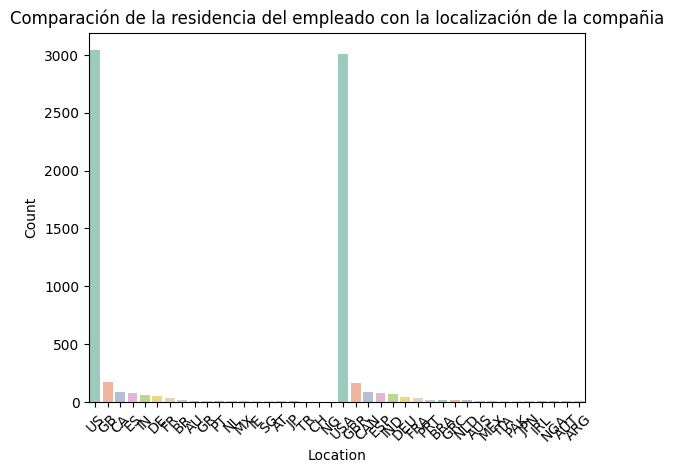

In [107]:

plt.figure()

sns.barplot(x=top_15.index, y=top_15.values, palette=sns.color_palette('Set2'), alpha=0.7, label='Employee Residence')
sns.barplot(x=top_res.index, y=top_res.values, palette=sns.color_palette('Set2'), alpha=0.7, label='Company Location')
# COMBIAR AMBOS

plt.xlabel('Location')
plt.ylabel('Count')
plt.title('Comparación de la residencia del empleado con la localización de la compañia')


plt.xticks(rotation=45)

plt.show()

In [34]:
group = pd.DataFrame(df.groupby(['experience_level','company_size']).size())
group

0
experience_level company_size      
EN               L              100
                 M              171
                 S               49
EX               L               13
                 M               95
                 S                6
MI               L              134
                 M              621
                 S               50
SE               L              207
                 M             2266
                 S               43

In [33]:
plt.figure()

sns.countplot(x=exp_size.index, data=exp_size, hue = group['company_size'])

NameError: name 'exp_size' is not defined

<Figure size 640x480 with 0 Axes>

### Analsis Multivariante

## HIPÓTESIS

In [36]:
df.select_dtypes(exclude=['object']).corr()


,work_year,salary_in_usd,remote_ratio
work_year,1.00000,0.228290,-0.236430
salary_in_usd,0.22829,1.000000,-0.064171
remote_ratio,-0.23643,-0.064171,1.000000
